<a href="https://colab.research.google.com/github/smritisinha0801/Edulyt-project/blob/main/Credit_Banking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install xlrd


In [ ]:
df=pd.read_excel("Credit Banking_Project - 1.xls", sheet_name='Customer Acqusition' , engine='xlrd')

In [ ]:
df1=pd.read_excel("Credit Banking_Project - 1.xls", sheet_name='Spend' , engine='xlrd')

In [ ]:
df2=pd.read_excel("Credit Banking_Project - 1.xls", sheet_name='Repayment' , engine='xlrd')

In [ ]:
df.head(10)

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,11.559307,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary
5,6,A6,35.578586,DELHI,Silver,100000,C6,Self Employed
6,7,A7,52.102217,COCHIN,Silver,100001,C7,Salaried_MNC
7,8,A8,77.839595,PATNA,Silver,100002,C8,Salaried_Pvt
8,9,A9,18.158058,CHENNAI,Silver,100003,C9,Govt
9,10,A10,4.143754,CALCUTTA,Gold,500000,C10,Normal Salary


In [ ]:
df1.head(10)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,473775.834869
1,2,A1,2004-01-03,PETRO,335578.666019
2,3,A1,2004-01-15,CLOTHES,371040.941912
3,4,A1,2004-01-25,FOOD,141177.813256
4,5,A1,2005-01-17,CAMERA,398403.771812
5,6,A1,2005-02-23,SANDALS,429084.568141
6,7,A1,2005-02-01,CAR,219341.961771
7,8,A8,2004-02-05,BIKE,60301.644710
8,9,A9,2005-02-28,AUTO,199770.925237
9,10,A10,2005-02-16,SHOPPING,71117.211995


In [ ]:
df2.head(10)

,SL No:,Customer,Month,Amount
0,1,A1,2004-01-12,331844.007374
1,2,A1,2004-01-03,441139.807335
2,3,A1,2004-01-15,32480.004009
3,4,A1,2004-01-25,90636.966534
4,5,A1,2005-01-17,1581.969829
5,6,A1,2005-02-23,357678.507744
6,7,A1,2005-02-01,280990.709927
7,8,A8,2004-02-05,117697.053061
8,9,A9,2005-02-28,8047.300780
9,10,A10,2005-02-16,407418.805366


In [ ]:
df['Age']=df['Age'].round().astype(int)

In [ ]:
print (df['Age'])

0      1
1     36
2     12
3     46
4     70
      ..
95    30
96    21
97    41
98    22
99    24
Name: Age, Length: 100, dtype: int64


In [ ]:
# median of age whose age is less than 18
df3=df.loc[df['Age'] < 18 , 'Age']= df['Age'].median()
print(df3)

41.0


In [ ]:
df1['Month'] = pd.to_datetime(df1['Month'])
df2['Month'] = pd.to_datetime(df2['Month'])

In [ ]:
# Monthly spend of each customer
monthly_spend=df1.groupby(['Customer','Month'])['Amount'].sum().reset_index()
monthly_spend.rename(columns={'Amount': 'Monthly_Spend'}, inplace=True)

In [ ]:
print(monthly_spend)

     Customer      Month  Monthly_Spend
0          A1 2004-01-03  335578.666019
1          A1 2004-01-12  526000.887677
2          A1 2004-01-15  371040.941912
3          A1 2004-01-25  278552.250673
4          A1 2004-02-05   41381.105869
...       ...        ...            ...
1252      A95 2004-01-15  347833.879524
1253      A96 2004-01-25  320363.535698
1254      A97 2004-01-12  164330.042270
1255      A98 2004-01-03   87483.511992
1256      A99 2004-01-15  476020.386647

[1257 rows x 3 columns]


In [ ]:
#Monthly repayment of each customer
monthly_repayment=df2.groupby(['Customer','Month'])['Amount'].sum().reset_index()
monthly_repayment.rename(columns={'Amount': 'Monthly_Repayment'}, inplace=True)

In [ ]:
print(monthly_repayment)

     Customer      Month  Monthly_Repayment
0          A1 2004-01-03      441139.807335
1          A1 2004-01-12      721918.797363
2          A1 2004-01-15      109079.663890
3          A1 2004-01-25       90636.966534
4          A1 2004-02-05      191180.011618
...       ...        ...                ...
1276      A95 2004-01-15       75109.492228
1277      A96 2004-01-25      110139.014148
1278      A97 2004-01-12      174606.392283
1279      A98 2004-01-03       97802.598995
1280      A99 2004-01-15      358589.924345

[1281 rows x 3 columns]


In [ ]:
df_monthly = pd.merge(monthly_spend, monthly_repayment, on=['Customer', 'Month'], how='left')

In [ ]:
#customer who have spent more than his/her Credit Limit for any particular month
spend=df1.groupby(['Customer','Month'])['Amount'].sum().reset_index()
limits=df[['Customer','Limit']].drop_duplicates()
overspend=pd.merge(spend, limits, on='Customer')
overspend=overspend[overspend['Amount'] > overspend['Limit']]
print(overspend)

     Customer      Month         Amount   Limit
1          A1 2004-01-12  526000.887677  500000
9          A1 2005-02-23  704755.260545  500000
15        A10 2004-01-15  609828.254814  500000
33        A11 2004-01-25  676996.216426  500000
34        A11 2004-02-05  501940.267611  500000
...       ...        ...            ...     ...
1246       A9 2006-07-03  476269.151151  100003
1253      A96 2004-01-25  320363.535698  100000
1254      A97 2004-01-12  164330.042270   10000
1255      A98 2004-01-03   87483.511992   10001
1256      A99 2004-01-15  476020.386647   10002

[595 rows x 4 columns]


In [ ]:
#Highest paying 10 customers
top_payers=df1.groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(10).reset_index
print(top_payers)

<bound method Series.reset_index of Customer
A22    9.637819e+06
A40    9.595040e+06
A60    9.317672e+06
A61    9.148468e+06
A48    9.056652e+06
A42    8.665639e+06
A41    8.583532e+06
A39    8.526678e+06
A45    8.498612e+06
A13    8.042339e+06
Name: Amount, dtype: float64>


In [ ]:
# People in which segment are spending more money
merged_df = pd.merge(df1, df[['Customer', 'Segment']], on='Customer', how='left')
segment_spend = (
    merged_df.groupby('Segment')['Amount']
    .sum()
    .reset_index()
    .sort_values(by='Amount', ascending=False)
)
print(segment_spend)

         Segment        Amount
1  Normal Salary  1.077071e+08
3   Salaried_Pvt  7.170431e+07
4  Self Employed  7.097548e+07
0           Govt  6.732563e+07
2   Salaried_MNC  6.363949e+07


In [ ]:
# Merge monthly spend with age groups
bins = [0, 25, 40, 55, 70, 100]
labels = ['<25', '25-40', '40-55', '55-70', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
monthly_spend_age = pd.merge(monthly_spend, df[['Customer', 'AgeGroup']], on='Customer', how='left')
agegroup_spend = monthly_spend_age.groupby('AgeGroup')['Monthly_Spend'].sum().sort_values(ascending=False).reset_index()
print("Total spend by age group:")
print(agegroup_spend)

Total spend by age group:
  AgeGroup  Monthly_Spend
0    40-55   1.661823e+08
1    55-70   8.303480e+07
2      70+   6.747930e+07
3    25-40   4.461056e+07
4      <25   2.004506e+07


<ipython-input-105-272890642198>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_spend = monthly_spend_age.groupby('AgeGroup')['Monthly_Spend'].sum().sort_values(ascending=False).reset_index()


In [ ]:
# In which category the customers are spending more money
category_spend = df1.groupby('Type')['Amount'].sum().sort_values(ascending=False).reset_index()
print(category_spend)

            Type        Amount
0          PETRO  5.102258e+07
1         CAMERA  4.372101e+07
2           FOOD  3.829646e+07
3     AIR TICKET  3.743547e+07
4   TRAIN TICKET  3.181262e+07
5       SHOPPING  2.741868e+07
6      JEWELLERY  2.524795e+07
7     BUS TICKET  2.490590e+07
8        CLOTHES  2.479110e+07
9         RENTAL  2.091467e+07
10  MOVIE TICKET  1.878458e+07
11          BIKE  1.315264e+07
12          AUTO  1.050509e+07
13           CAR  7.018278e+06
14       SANDALS  6.325017e+06


In [ ]:
due_df = pd.merge(monthly_spend, monthly_repayment, on=['Customer', 'Month'], how='left')
due_df['Monthly_Repayment'] = due_df['Monthly_Repayment'].fillna(0)
due_df['Due'] = due_df['Monthly_Spend'] - due_df['Monthly_Repayment']


In [ ]:
# the most profitable segment and imposing interest rate of 2.9%
due_df['Interest'] = due_df['Due'].apply(lambda x: x * 0.029 if x > 0 else 0)
due_df = pd.merge(due_df, df[['Customer', 'Segment']], on='Customer', how='left')
segment_profit = due_df.groupby('Segment')['Interest'].sum().sort_values(ascending=False).reset_index()
print("Profit by segment:")
print(segment_profit)

Profit by segment:
         Segment      Interest
0  Normal Salary  2.303836e+06
1   Salaried_Pvt  1.552768e+06
2  Self Employed  1.429721e+06
3           Govt  1.429713e+06
4   Salaried_MNC  1.411598e+06


In [ ]:
# Monthly profit for the bank
due_df['YearMonth'] = due_df['Month'].dt.to_period('M').astype(str)
monthly_profit = due_df.groupby('YearMonth')['Interest'].sum().reset_index()
monthly_profit.rename(columns={'Interest': 'Monthly_Profit'}, inplace=True)
print("Monthly profit for the bank:")
print(monthly_profit)


Monthly profit for the bank:
   YearMonth  Monthly_Profit
0    2004-01    1.256012e+06
1    2004-02    1.793159e+05
2    2004-03    9.154651e+04
3    2004-04    1.643372e+05
4    2004-05    8.205470e+04
5    2004-09    9.154437e+04
6    2004-11    9.582968e+04
7    2005-01    1.649648e+05
8    2005-02    8.081302e+05
9    2005-04    1.887468e+05
10   2005-05    8.759361e+05
11   2005-06    2.455584e+05
12   2005-07    5.939642e+04
13   2005-08    1.758462e+05
14   2005-09    7.448209e+04
15   2005-10    6.781187e+04
16   2005-11    2.800729e+05
17   2005-12    7.118539e+04
18   2006-01    8.442437e+04
19   2006-02    2.443596e+05
20   2006-03    1.107813e+06
21   2006-04    6.104593e+05
22   2006-05    3.202697e+05
23   2006-06    1.042251e+05
24   2006-07    1.844585e+05
25   2006-08    6.469297e+04
26   2006-09    9.283642e+04
27   2006-10    7.869004e+04
28   2006-11    1.856346e+05
29   2006-12    7.700067e+04


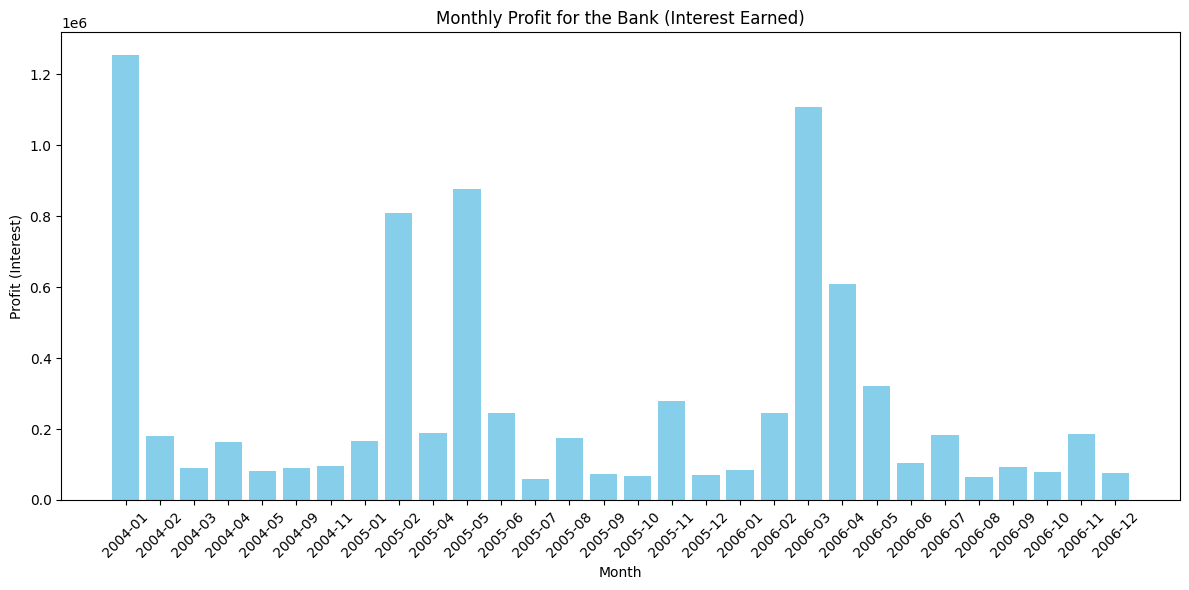

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(monthly_profit['YearMonth'], monthly_profit['Monthly_Profit'], color='skyblue')
plt.title('Monthly Profit for the Bank (Interest Earned)')
plt.xlabel('Month')
plt.ylabel('Profit (Interest)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()